In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astroquery import 
from pyia import GaiaData
%matplotlib inline

In [2]:
#Name of Kinematic data file
data_file = 'data/GaiaDR2_vrad_vel.fits'

#make Astropy.io.fits HDU object
data_hdu = fits.open(data_file)

#Extract data and header
data_table = data_hdu[1].data
data_header = data_hdu[1].header

#Explicitly name Gaia DR2 source ID
source_ids = data_table['source_id']

In [ ]:
query_chunks = []
for i in range(100):
    print(i)
    q_str = "Select phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag \
    FROM gaiadr2.gaia_source as gdr2 \
    WHERE gdr2.source_id IN ("
    for sid in source_ids[i::100]:
        q_str += str(sid) +','
    q_str = q_str[:-1]
    q_str += ')'
    print('made string')
    foo = GaiaData.from_query(q_str)
    query_chunks.append(foo)

0
made string
Launched query: 'Select phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag     FROM gaiadr2.gaia_source as gdr2     WHERE gdr2.source_id IN (2851858288640,320511935224192,598099965780352,861712174120064,1155453577587072,1428785296198272,1764647443263232,2130342434510080,2468334884889216,2766508694709248,3096396542797696,3409589853331840,3775624146118400,4067166526164864,4435842223340032,4745663984268800,5091391671980544,5393589866227328,5721377474641536,6038109838396032,6364767871053440,6729835796036608,7005027235989376,7283993951733376,7606318361748864,7930266270668544,8189338697935360,8521563008205056,8892991779967616,9296199014344576,9669624946301184,9973154579687168,10269580338010240,10563974576460416,10904475287951744,11184992487790976,11522989233962240,11869369756883328,12150398056569984,12422321026174720,12754098659827840,13065982004906368,13450909858139904,13817566921833984,14220606653057920,14609627610643712,14943569907922048,15289984790155136,15651822899798144,16

Query finished.
1
made string
Launched query: 'Select phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag     FROM gaiadr2.gaia_source as gdr2     WHERE gdr2.source_id IN (3332894779520,326009493361152,600608226687232,871637842928896,1156896686572160,1432805385587072,1774135026457216,2131132708492032,2469644850602624,2769777165164416,3098011450500736,3411715861523712,3776002103239680,4070430701262336,4438006887414400,4747592425158400,5092010146935808,5397365141967744,5722854943859584,6038414780619264,6366245339802752,6730286767866496,7016125431437696,7284749865978368,7610888206950784,7931533285417344,8195351652145408,8522318921883264,8894228730549248,9297573403888896,9673022264838656,9973498177070208,10285042220406400,10569021162258816,10905716534281728,11185988920204416,11523126672914048,11870056951650304,12151703726627456,12425688280537984,12755159516357888,13069379323459072,13453353695296000,13834781150769280,14226997564383488,14610692762530432,14945524117414528,15292454395718016,1565

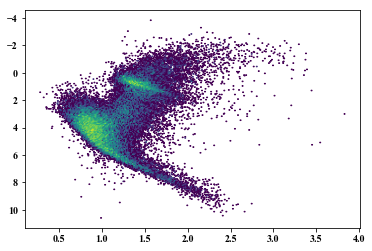

In [31]:
plt.hexbin(foo.phot_bp_mean_mag - foo.phot_rp_mean_mag,
           5 + foo.phot_g_mean_mag.value - 5*np.log10(data_table['dist']),
           gridsize = 300, mincnt = 1, bins = 'log')
#plt.xlim(0.5,2)
#plt.ylim(10,4);
plt.gca().invert_yaxis()

In [42]:
foo = np.arange(1000)
bar = []
for i in range(5):
    for sid in foo[i::5]:
        bar.append(sid)
bar = np.array(bar)
bar.sort()
np.all(bar == foo)
len(bar)

1000